# Importing the required modules

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.model_selection import train_test_split as tts

In [41]:
df = pd.read_csv('RAT01.csv')
df1 = pd.read_csv('RAT02.csv')
df2 = pd.read_csv('RAT03.csv')
df3 = pd.read_csv('RAT04.csv')
df4 = pd.read_csv('RAT05.csv')
df5 = pd.read_csv('RAT06.csv')
df6 = pd.read_csv('RAT07.csv')
df7 = pd.read_csv('RAT08.csv')
for i in (df.columns.values):
    print(type(i))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [42]:
df.head()
df.shape


(89733, 7)

In [43]:
import pandas as pd

dfs = []  # List to store the DataFrames

for i in range(1, 9):
    file_name = f'RAT0{i}.csv'  # Construct the file name
    df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame
    df['Target'] = file_name[:-4]  # Add a 'Target' column with values as filename without extension

    if i == 1:
        df['Malicious'] = (df['Source'] == '147.32.83.234') | (df['Destination'] == '147.32.83.234')
    elif i == 2:
        df['Malicious'] = (df['Source'] == '147.32.83.253') | (df['Destination'] == '147.32.83.253')
    elif i == 3:
        df['Malicious'] = (df['Source'] == '35.201.97.85') | (df['Destination'] == '35.201.97.85')
    elif i == 4:
        df['Malicious'] = (df['Source'] == '147.32.83.181') | (df['Destination'] == '147.32.83.181')
    elif i == 5:
        df['Malicious'] = (df['Source'] == '147.32.83.234') | (df['Destination'] == '147.32.83.234')
    elif i == 6:
        df['Malicious'] = (df['Source'] == '192.168.131.1') | (df['Destination'] == '192.168.131.1')
    elif i == 7:
        df['Malicious'] = (df['Source'] == '147.32.83.230') | (df['Destination'] == '147.32.83.230')
    elif i == 8:
        df['Malicious'] = (df['Source'] == '147.32.83.157') | (df['Destination'] == '147.32.83.157')

    # Convert the boolean values in the 'Malicious' column to 0 or 1
    df['Malicious'] = df['Malicious'].astype(int)

    dfs.append(df)  # Append the DataFrame to the list

df_merge = pd.concat(dfs, ignore_index=True)

# Print the first few rows of the DataFrame where 'Malicious' is equal to 1
print(df_merge[df_merge['Malicious'] == 1]['Info'].head())


26853    37451  >  1337 [SYN] Seq=0 Win=65535 Len=0 MSS...
26854    1337  >  37451 [SYN, ACK] Seq=0 Ack=1 Win=6553...
26855    37451  >  1337 [ACK] Seq=1 Ack=1 Win=88064 Len...
26856    37451  >  1337 [ACK] Seq=1 Ack=1 Win=88064 Len...
26858    37451  >  1337 [ACK] Seq=1350 Ack=1 Win=88064 ...
Name: Info, dtype: object


In [44]:
df_merge.head(44019)

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malicious
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0
...,...,...,...,...,...,...,...,...,...
44014,44015,2848.094320,147.32.83.234,10.8.0.61,TCP,52,1337 > 37649 [ACK] Seq=22 Ack=7940131 Win=10...,RAT01,1
44015,44016,2848.094439,10.8.0.61,147.32.83.234,TCP,1400,37649 > 1337 [ACK] Seq=7945523 Ack=22 Win=88...,RAT01,1
44016,44017,2848.094458,147.32.83.234,10.8.0.61,TCP,52,1337 > 37649 [ACK] Seq=22 Ack=7942827 Win=10...,RAT01,1
44017,44018,2848.094653,10.8.0.61,147.32.83.234,TCP,1400,37649 > 1337 [ACK] Seq=7946871 Ack=22 Win=88...,RAT01,1


In [45]:
import re
Sourceport_ips = []
Destination_ips = []
for i in range(len(df_merge['Info'])):
    text = str(df_merge['Info'][i])
    # Use a regular expression to extract the desired part
    match = re.search(r'(\d+\s{2}\>\s{2}\d+)', text)

    if match:
        result = match.group(1)
        result=result.split('  ')
        if '>' in result:
            result.remove('>')
        t = int(result[0])
        Sourceport_ips.append(t)
        t1 = int(result[1])
        Destination_ips.append(t1)
        #This is a Source ip and Source port number tuple
    else:
        Sourceport_ips.append(0)
        Destination_ips.append(0)

In [46]:
df_merge['Source_port'] = Sourceport_ips
df_merge['Destination_port'] = Destination_ips
df_merge['Above_1024'] = np.where((df_merge['Source_port'] > 1024) | (df_merge['Destination_port'] > 1024), 1, 0)
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malicious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


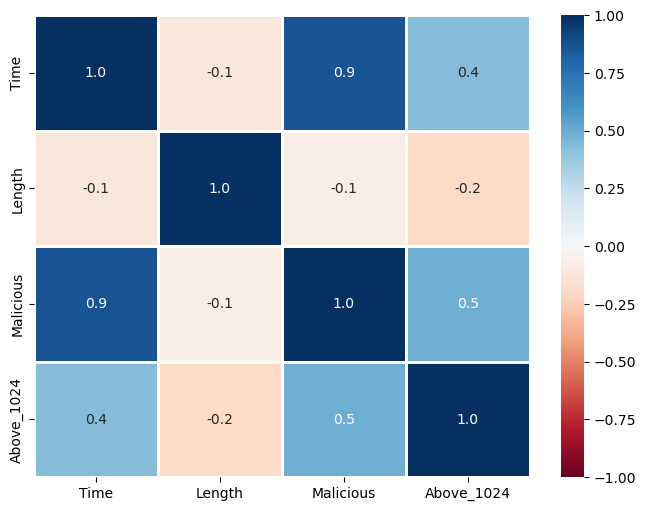

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest from your DataFrame
selected_columns = df_merge[['Time', 'Length','Malicious','Above_1024']]

# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']
# Calculate the correlation matrix for these selected columns
correlation_matrix = selected_columns.corr()

# Create a figure with the desired size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt='.1f', linewidths=2)

# Show the heatmap
plt.show()


In [48]:
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malicious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


In [49]:
Y = df_merge['Malicious']
X = df_merge.drop("Target",axis=1)
X.shape

(563334, 11)

In [50]:
X.Source.value_counts().sort_values(ascending=False).head(10)

Source
10.8.0.93                          112298
157.240.30.27                      103254
147.32.83.181                       50035
10.8.0.61                           44945
157.240.30.63                       34676
10.8.0.249                          33736
216.58.201.99                       24371
2a03:2880:f03d:1c:face:b00c:0:3     20690
10.8.0.57                           20332
10.8.0.117                          16643
Name: count, dtype: int64

In [51]:
top_10_malicious_sources = df_merge[df_merge['Malicious'] == 1]['Source'].value_counts().head(10).index.tolist()
top_10_malicious_sources

['10.8.0.93',
 '147.32.83.181',
 '10.8.0.61',
 '147.32.83.234',
 '10.8.0.137',
 '35.201.97.85',
 '10.8.0.249',
 '10.8.0.57',
 '147.32.83.253',
 '10.8.0.117']

In [52]:
for label in top_10_malicious_sources:
    X[label] = np.where(X['Source'] == label, 1, 0)
X[['Source']+top_10_malicious_sources].head(5)


,Source,10.8.0.93,147.32.83.181,10.8.0.61,147.32.83.234,10.8.0.137,35.201.97.85,10.8.0.249,10.8.0.57,147.32.83.253,10.8.0.117
0,10.8.0.61,0,0,1,0,0,0,0,0,0,0
1,10.8.0.61,0,0,1,0,0,0,0,0,0,0
2,8.8.8.8,0,0,0,0,0,0,0,0,0,0
3,8.8.8.8,0,0,0,0,0,0,0,0,0,0
4,10.8.0.61,0,0,1,0,0,0,0,0,0,0


In [53]:
top_10_malicious_sources_Destinations = df_merge[df_merge['Malicious'] == 1]['Destination'].value_counts().head(10).index.tolist()
top_10_malicious_sources_Destinations

['147.32.83.181',
 '10.8.0.93',
 '147.32.83.234',
 '10.8.0.61',
 '10.8.0.249',
 '10.8.0.137',
 '35.201.97.85',
 '147.32.83.253',
 '10.8.0.57',
 '147.32.83.230']

In [54]:
for label in top_10_malicious_sources_Destinations:
    X[label] = np.where(X['Source'] == label, 1, 0)
X[['Source']+top_10_malicious_sources_Destinations].head(5)


,Source,147.32.83.181,10.8.0.93,147.32.83.234,10.8.0.61,10.8.0.249,10.8.0.137,35.201.97.85,147.32.83.253,10.8.0.57,147.32.83.230
0,10.8.0.61,0,0,0,1,0,0,0,0,0,0
1,10.8.0.61,0,0,0,1,0,0,0,0,0,0
2,8.8.8.8,0,0,0,0,0,0,0,0,0,0
3,8.8.8.8,0,0,0,0,0,0,0,0,0,0
4,10.8.0.61,0,0,0,1,0,0,0,0,0,0


In [55]:
top_10 = [x for x in X.Source.value_counts().sort_values(ascending=False).head(10).index]
top_10

['10.8.0.93',
 '157.240.30.27',
 '147.32.83.181',
 '10.8.0.61',
 '157.240.30.63',
 '10.8.0.249',
 '216.58.201.99',
 '2a03:2880:f03d:1c:face:b00c:0:3',
 '10.8.0.57',
 '10.8.0.117']

In [56]:
for label in top_10:
    X[label]=np.where(X['Source']==label,1,0)
X[['Source']+top_10].head(5)

,Source,10.8.0.93,157.240.30.27,147.32.83.181,10.8.0.61,157.240.30.63,10.8.0.249,216.58.201.99,2a03:2880:f03d:1c:face:b00c:0:3,10.8.0.57,10.8.0.117
0,10.8.0.61,0,0,0,1,0,0,0,0,0,0
1,10.8.0.61,0,0,0,1,0,0,0,0,0,0
2,8.8.8.8,0,0,0,0,0,0,0,0,0,0
3,8.8.8.8,0,0,0,0,0,0,0,0,0,0
4,10.8.0.61,0,0,0,1,0,0,0,0,0,0


In [57]:
top_10 = [x for x in X.Destination.value_counts().sort_values(ascending=False).head(10).index]
top_10                                                                                  

['147.32.83.181',
 '10.8.0.93',
 '10.8.0.249',
 '10.8.0.61',
 '10.8.0.57',
 '147.32.83.234',
 '2001:718:2:903:b877:48ae:9531:fbfc',
 '10.8.0.117',
 '157.240.30.27',
 '10.8.0.137']

In [58]:
for label in top_10:
    X[label]=np.where(X['Destination']==label,1,0)
X[['Destination']+top_10].head(5)

,Destination,147.32.83.181,10.8.0.93,10.8.0.249,10.8.0.61,10.8.0.57,147.32.83.234,2001:718:2:903:b877:48ae:9531:fbfc,10.8.0.117,157.240.30.27,10.8.0.137
0,8.8.8.8,0,0,0,0,0,0,0,0,0,0
1,8.8.8.8,0,0,0,0,0,0,0,0,0,0
2,10.8.0.61,0,0,0,1,0,0,0,0,0,0
3,10.8.0.61,0,0,0,1,0,0,0,0,0,0
4,8.8.8.8,0,0,0,0,0,0,0,0,0,0


In [59]:
top_10 = [x for x in X.Protocol.value_counts().sort_values(ascending=False).head(10).index]
top_10

['TCP',
 'QUIC',
 'TLSv1.3',
 'TLSv1.2',
 'GQUIC',
 'DNS',
 'ICMP',
 'IRC',
 'ICMPv6',
 'WebSocket']

In [60]:
for label in top_10:
    X[label]=np.where(X['Protocol']==label,1,0)
X[['Protocol']+top_10].head()

,Protocol,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
0,DNS,0,0,0,0,0,1,0,0,0,0
1,TCP,1,0,0,0,0,0,0,0,0,0
2,TCP,1,0,0,0,0,0,0,0,0,0
3,DNS,0,0,0,0,0,1,0,0,0,0
4,TCP,1,0,0,0,0,0,0,0,0,0


In [61]:
X.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Malicious', 'Source_port', 'Destination_port', 'Above_1024',
       '10.8.0.93', '147.32.83.181', '10.8.0.61', '147.32.83.234',
       '10.8.0.137', '35.201.97.85', '10.8.0.249', '10.8.0.57',
       '147.32.83.253', '10.8.0.117', '147.32.83.230', '157.240.30.27',
       '157.240.30.63', '216.58.201.99', '2a03:2880:f03d:1c:face:b00c:0:3',
       '2001:718:2:903:b877:48ae:9531:fbfc', 'TCP', 'QUIC', 'TLSv1.3',
       'TLSv1.2', 'GQUIC', 'DNS', 'ICMP', 'IRC', 'ICMPv6', 'WebSocket'],
      dtype='object')

In [62]:
X.drop(['Source','Destination','Protocol','Info','No.'],axis=1,inplace=True)
X.shape

(563334, 32)

In [63]:
X.columns

Index(['Time', 'Length', 'Malicious', 'Source_port', 'Destination_port',
       'Above_1024', '10.8.0.93', '147.32.83.181', '10.8.0.61',
       '147.32.83.234', '10.8.0.137', '35.201.97.85', '10.8.0.249',
       '10.8.0.57', '147.32.83.253', '10.8.0.117', '147.32.83.230',
       '157.240.30.27', '157.240.30.63', '216.58.201.99',
       '2a03:2880:f03d:1c:face:b00c:0:3', '2001:718:2:903:b877:48ae:9531:fbfc',
       'TCP', 'QUIC', 'TLSv1.3', 'TLSv1.2', 'GQUIC', 'DNS', 'ICMP', 'IRC',
       'ICMPv6', 'WebSocket'],
      dtype='object')

In [64]:
len(['2848.094707','1400','1','37649','1337','1','0','0','1','1','0','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0'])

32

In [65]:
df_merge.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Target,Malicious,Source_port,Destination_port,Above_1024
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01,0,0,0,0
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01,0,45949,853,1
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01,0,853,45949,1
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01,0,0,0,0
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01,0,45949,853,1


In [66]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size=.3,random_state=1)
X.shape

(563334, 32)

In [67]:
x_train

,Time,Length,Malicious,Source_port,Destination_port,Above_1024,10.8.0.93,147.32.83.181,10.8.0.61,147.32.83.234,...,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
557397,175.425611,83,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
193851,254.574128,1401,0,443,42881,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
277698,242.417179,40,0,39140,443,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
547701,67.061160,1400,0,443,48892,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
378200,6478.267533,1400,1,41714,8000,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,6474.430126,52,1,8000,41714,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
491263,109.810933,1294,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
470924,1964.326620,654,1,36280,1337,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
491755,110.435982,508,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
# Convert feature names to strings
x_train.columns = x_train.columns.astype(str)

# Split the data
x_train, x_test, y_train, y_test = tts(x_train, y_train, test_size=0.3, random_state=1)

# Perform standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [69]:
# Transform your new data point 'temp' using the fitted StandardScaler
temp = ['2848.094707','1400','1','37649','1337','1','0','0','1','1','0','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0']

# Convert the elements in 'temp' to floats
temp = [float(value) for value in temp]

# Reshape the data to a 2D array
temp_2d = [temp]

# Transform the new data point using the same StandardScaler
temp_transformed = sc.transform(temp_2d)

# 'temp_transformed' now contains the scaled values of 'temp'
print(temp_transformed)


[[ 0.24543088  0.8029262   1.2913874   0.99916564 -0.69820515  0.64856689
  -0.41343837 -0.46652525  3.4100536   3.80589721 -0.21012317 -0.05451809
  -0.33812106 -0.28820129 -0.04276925 -0.23503317 -0.03237396 -0.21998891
  -0.25448258 -0.21318739 -0.19576282 -0.23804735  0.64900657 -0.47147444
  -0.26851019 -0.19028028 -0.07712004 -0.04877037 -0.03265311 -0.02778926
  -0.02331756 -0.01941413]]


In [70]:
x_train.shape


(276033, 32)

In [71]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# # Create a Random Forest classifier
# clf = RandomForestClassifier(random_state=1)

# # Define a grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform a grid search with cross-validation
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Get the best model
# best_clf = grid_search.best_estimator_

# # Evaluate the model with classification report
# y_pred = best_clf.predict(x_test)
# print(classification_report(y_test, y_pred))


In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with specified hyperparameters
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Compute the accuracy score on the training data
training_accuracy = clf.score(x_train, y_train)


print(f"Accuracy on training data: {training_accuracy}")


Accuracy on training data: 1.0


In [73]:
from sklearn.metrics import classification_report
y_pred_dt = clf.predict(x_test)
clf.score(x_test,y_pred_dt)    
# print(classification_report(y_test,y_pred_dt))

1.0

In [74]:
print(clf.predict(temp_transformed))

[1]


# Prediction

In [84]:
import random

# Generate a list of 26 random numbers between -1 and 1
random_numbers = [random.uniform(-1, 1) for _ in range(32)]

# Print the list
print(random_numbers)

print(clf.predict([random_numbers])[0])

[0.06667522666837344, -0.7390259244870263, 0.7045656527621702, -0.4579948369052207, -0.5339935101091653, -0.8266950619486553, 0.4860717682488589, 0.36544223755922345, -0.7460248383945545, -0.7193881286520865, 0.4104033390348092, -0.03226220481224518, -0.5287028381583874, -0.08709923112784113, 0.2756792269567867, 0.18994882331531793, 0.6032127214172813, 0.5432828589463019, -0.7081327976461265, -0.026350526486734305, 0.04593933168795861, -0.6649436827894504, 0.7928183113777993, 0.6738047110869787, -0.9849892304194303, 0.6159760967205004, 0.8782704023459724, -0.12438384777959222, 0.41791185278362386, -0.49894493078194824, -0.7115420294216346, -0.10665288629279268]
1


In [76]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred_dt) 

# Model accuracy 

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [78]:
acc=clf.score(x_test,y_test)
print(acc)

1.0


In [79]:
acc = round(acc*100,2)
print(f'Accuracy of Random Forest classifier on training set: {acc} %')

Accuracy of Random Forest classifier on training set: 100.0 %


# Decision Tree

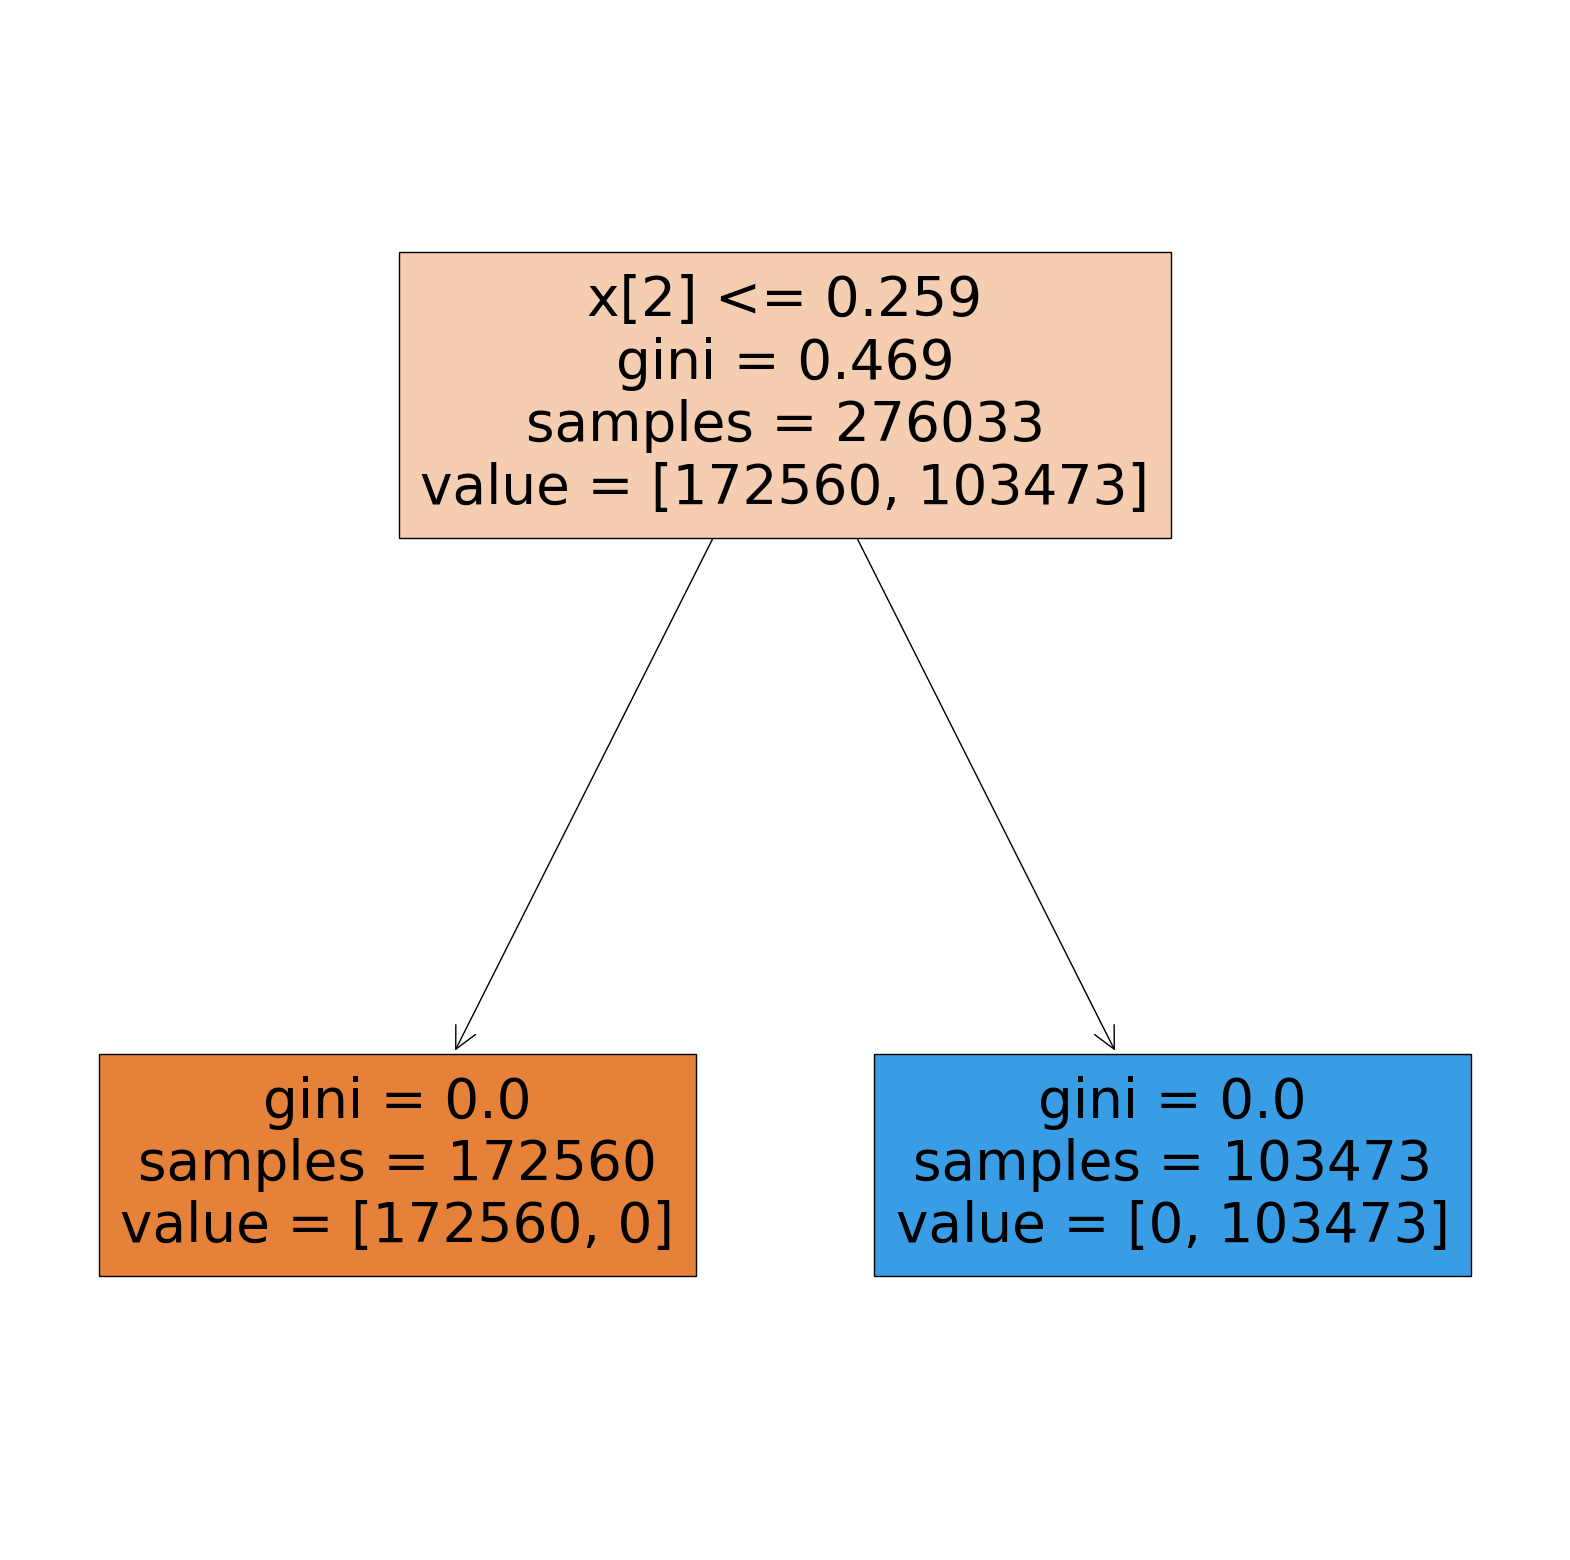

In [80]:
from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=8)
dec = dec.fit(x_train,y_train)
acc = dec.score(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dec,filled=True)
plt.show()

In [81]:
print(f'Accuracy of Decision Tree classifier on training set: {round(acc*100,2)} %')

Accuracy of Decision Tree classifier on training set: 100.0 %


# Saving model for future use

In [82]:
import joblib

model_filename = 'Random_forest_model.pkl'
joblib.dump(clf, model_filename)


['Random_forest_model.pkl']